In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Personal python module for masks and profiles (available on github)
import gilphot as gp 

In [2]:
# Loading in images
fitsfile_sub = "/home/cgilhuly/Workspace/Images/NGC4565_g_res_final.fits"
image_g_sub, header_g_sub = fits.getdata(fitsfile_sub, header=True)

fitsfile2_sub = "/home/cgilhuly/Workspace/Images/NGC4565_r_res_final.fits"
image_r_sub, header_r_sub = fits.getdata(fitsfile2_sub, header=True)

# Coordinates of image centre
center_sub = (502, 500) 

# Sky values and errors for each image quadrant
skyval_g_SE_sub = -0.842 # Based on greatest difference between adjacent radial bin
skyval_g_SE_err = 0.012  
skyval_g_SE_sys = 0.145 

skyval_g_NW_sub = -1.174 
skyval_g_NW_err = 0.027
skyval_g_NW_sys = 0.246

skyval_r_SE_sub = -0.932
skyval_r_SE_err =  0.013 
skyval_r_SE_sys = 0.152 

skyval_r_NW_sub = -1.433 
skyval_r_NW_err =  0.031
skyval_r_NW_sys = 0.588

# Image zeropoints (NOTE: no colour term included for g-band)
zerop_g = 27.299 
zerop_r = 27.032

# Galactic extinction (Schlafly et al. 2011; accessed via NED)
extinct_g = 0.051
extinct_r = 0.035

pix_size = 2.5 # arcsec

# Loading source mask
mask_sub = fits.getdata("/home/cgilhuly/Workspace/Images/NGC4565_cutout_res_mask_v6.fits", header=False)

# Masking out already masked regions of each image (union, not intersection)
mask_sub[ image_g_sub == 0.00 ] = 1
mask_sub[ image_r_sub == 0.00 ] = 1

Will consider change in sky (within given quadrant) inside/outside designated sky annulus as an appropriate estimate of systematic uncertainty in sky measurements. 

Random error in sky measurement is small compared to random error in flux measurement, very small compared to systematic uncertainty, and can be neglected.

# Calculating surface brightness and colour profiles

In [3]:
# Calculating NW profiles

rad_profile_g_sub, r_g_sub, err_g_sub = gp.radial_profile_slice(image_g_sub, mask_sub, center_sub, PA=136., width=5, bin_edges=[180,250,350,450], bin_widths=[3,5,10,50,100])
rad_profile_r_sub, r_r_sub, err_r_sub = gp.radial_profile_slice(image_r_sub, mask_sub, center_sub, PA=136., width=5, bin_edges=[180,250,350,450], bin_widths=[3,5,10,50,100])

mag_g_sub = zerop_g - 2.5*np.log10(np.array(rad_profile_g_sub) - skyval_g_NW_sub) + 5*np.log10(pix_size)
mag_r_sub = zerop_r - 2.5*np.log10(np.array(rad_profile_r_sub) - skyval_r_NW_sub) + 5*np.log10(pix_size)

# Upper and lower SB error limits (in mag/arcsec^2)
mag_g_p_sub, mag_g_m_sub = gp.calc_profile_error( rad_profile_g_sub, err_g_sub, skyval_g_NW_sub, skyval_g_NW_err, zerop_g )
mag_r_p_sub, mag_r_m_sub = gp.calc_profile_error( rad_profile_r_sub, err_r_sub, skyval_r_NW_sub, skyval_r_NW_err, zerop_r )

# Including systematic uncertainty in sky
mag_g_ps_sub, mag_g_ms_sub = gp.calc_profile_error( rad_profile_g_sub, err_g_sub, skyval_g_NW_sub, skyval_g_NW_err, zerop_g, skyval_g_NW_sys )
mag_r_ps_sub, mag_r_ms_sub = gp.calc_profile_error( rad_profile_r_sub, err_r_sub, skyval_r_NW_sub, skyval_r_NW_err, zerop_r, skyval_r_NW_sys )

# Colour and error (without and with sys. uncertainty in sky)
gmr_sub = np.array(mag_g_sub) - np.array(mag_r_sub)
gmr_err_sub = gp.calc_colour_error( rad_profile_g_sub, err_g_sub, rad_profile_r_sub, err_r_sub, skyval_g_NW_sub, skyval_r_NW_sub )
gmr_err_sub_sys = gp.calc_colour_error( rad_profile_g_sub, err_g_sub, rad_profile_r_sub, err_r_sub, skyval_g_NW_sub, skyval_r_NW_sub, skyval_g_NW_sys, skyval_r_NW_sys )

# Packaging up error bars for convenient plotting
g_err_NW = [mag_g_sub - mag_g_p_sub, mag_g_m_sub - mag_g_sub]
r_err_NW = [mag_r_sub - mag_r_p_sub, mag_r_m_sub - mag_r_sub]

gmr_p_NW = gmr_sub + gmr_err_sub_sys
gmr_m_NW = gmr_sub - gmr_err_sub_sys

/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/home/cgilhuly/Scripts/gilphot.py:201: RuntimeWarning: invalid value encountered in log10
  ) + 5*np.log10(pix_size)
/home/cgilhuly/Scripts/gilphot.py:205: RuntimeWarning: invalid value encountered in log10
  ) + 5*np.log10(pix_size)


In [4]:
# Calculating SE profiles

rad_profile_g_SE_sub, r_g_SE_sub, err_g_SE_sub = gp.radial_profile_slice(image_g_sub, mask_sub, center_sub, PA=316., width=5, bin_edges=[180,250,350,800], bin_widths=[3,5,10,50,100])
rad_profile_r_SE_sub, r_r_SE_sub, err_r_SE_sub = gp.radial_profile_slice(image_r_sub, mask_sub, center_sub, PA=316., width=5, bin_edges=[180,250,350,800], bin_widths=[3,5,10,50,100])

mag_g_SE_sub = zerop_g - 2.5*np.log10(np.array(rad_profile_g_SE_sub) - skyval_g_SE_sub) + 5*np.log10(pix_size)
mag_r_SE_sub = zerop_r - 2.5*np.log10(np.array(rad_profile_r_SE_sub) - skyval_r_SE_sub) + 5*np.log10(pix_size)

# Upper and lower SB error limits (in mag/arcsec^2)
mag_g_p_SE_sub, mag_g_m_SE_sub = gp.calc_profile_error( rad_profile_g_SE_sub, err_g_SE_sub, skyval_g_SE_sub, skyval_g_SE_err, zerop_g )
mag_r_p_SE_sub, mag_r_m_SE_sub = gp.calc_profile_error( rad_profile_r_SE_sub, err_r_SE_sub, skyval_r_SE_sub, skyval_r_SE_err, zerop_r )

# Including systematic uncertainty in sky
mag_g_ps_SE_sub, mag_g_ms_SE_sub = gp.calc_profile_error( rad_profile_g_SE_sub, err_g_SE_sub, skyval_g_SE_sub, skyval_g_SE_err, zerop_g, skyval_g_SE_sys )
mag_r_ps_SE_sub, mag_r_ms_SE_sub = gp.calc_profile_error( rad_profile_r_SE_sub, err_r_SE_sub, skyval_r_SE_sub, skyval_r_SE_err, zerop_r, skyval_r_SE_sys )

# Colour and error (without and with sys. uncertainty in sky)
gmr_SE_sub = np.array(mag_g_SE_sub) - np.array(mag_r_SE_sub)
gmr_err_SE_sub = gp.calc_colour_error( rad_profile_g_SE_sub, err_g_SE_sub, rad_profile_r_SE_sub, err_r_SE_sub, skyval_g_SE_sub, skyval_r_SE_sub )
gmr_err_SE_sub_sys = gp.calc_colour_error( rad_profile_g_SE_sub, err_g_SE_sub, rad_profile_r_SE_sub, err_r_SE_sub, skyval_g_SE_sub, skyval_r_SE_sub, skyval_g_SE_sys, skyval_r_SE_sys )

# Packaging up error bars for convenient plotting
g_err_SE = [mag_g_SE_sub - mag_g_p_SE_sub, mag_g_m_SE_sub - mag_g_SE_sub]
r_err_SE = [mag_r_SE_sub - mag_r_p_SE_sub, mag_r_m_SE_sub - mag_r_SE_sub]

gmr_p_SE = gmr_SE_sub + gmr_err_SE_sub_sys
gmr_m_SE = gmr_SE_sub - gmr_err_SE_sub_sys


/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/home/cgilhuly/Scripts/gilphot.py:205: RuntimeWarning: invalid value encountered in log10
  ) + 5*np.log10(pix_size)


# SE gr profiles with g-r lower panel

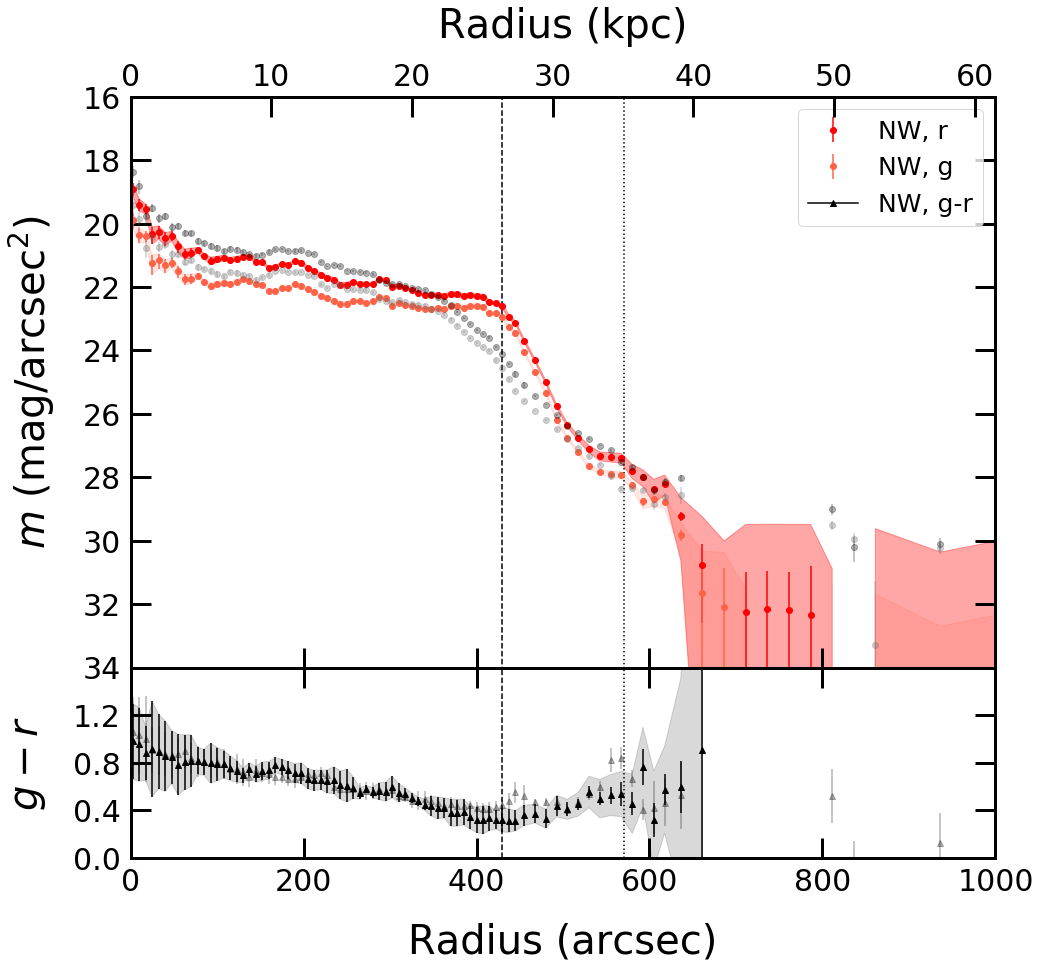

In [5]:
fig, ax0 = plt.subplots(ncols=1, nrows=2)
gs1 = gridspec.GridSpec(2,1,wspace=0,hspace=0, height_ratios = [3,1])

# Upper panel for plotting surface brightness profiles
ax = plt.subplot(gs1[0])

plt.errorbar( np.array(r_r_sub)*pix_size, mag_r_sub, yerr=r_err_NW, label="NW, r", fmt='o', color='red')
plt.errorbar( np.array(r_g_sub)*pix_size, mag_g_sub, yerr=g_err_NW, label="NW, g", fmt='o', color='tomato')

ax.errorbar([0], [0], label="NW, g-r", color='k', marker='^') # Dummy for legend in top panel

# Error envelopes including estimated systematic sky error
plt.fill_between(np.array(r_r_sub)*pix_size,mag_r_ps_sub, mag_r_ms_sub, alpha=0.35, color="red")
plt.fill_between(np.array(r_g_sub)*pix_size,mag_g_ps_sub, mag_g_ms_sub, alpha=0.15, color="tomato")

# Plotting SE profiles in faint grey for reference
plt.errorbar( np.array(r_r_SE_sub)*pix_size, mag_r_SE_sub, yerr=r_err_SE, color='black', fmt='o', alpha=0.3)
plt.errorbar( np.array(r_g_SE_sub)*pix_size, mag_g_SE_sub, yerr=g_err_SE, color='dimgrey', fmt='o', alpha=0.3)

leg = plt.legend(loc=1, prop={'size': 25})

# Setting label info
ax.set_ylabel(r"$m$ (mag/arcsec$^2$)", size=40, labelpad=25)
ax.tick_params(labelsize=30)
ax.set_xticklabels([]) 
ax.invert_yaxis()


# Lower panel for plotting colour profiles
ax2 = plt.subplot(gs1[1])

ax2.errorbar( np.array(r_r_sub)*pix_size, gmr_sub, yerr = gmr_err_sub, label="g-r", color='k', fmt='o', marker='^')
plt.fill_between(np.array(r_r_sub)*pix_size, gmr_m_NW, gmr_p_NW, alpha=0.15, color="k")

# Faint grey SE colour profile for reference
ax2.errorbar( np.array(r_r_SE_sub)*pix_size, gmr_SE_sub, yerr = gmr_err_SE_sub, color='black', fmt='o', marker='^', alpha=0.3)

# Setting label info
ax2.set_ylabel(r"$g-r$", size=40, labelpad=25)
ax2.set_xlabel(r"Radius (arcsec)", size=40, labelpad=25)
ax2.tick_params(labelsize=30)

# Tweaking weight of borders and ticks
ax.spines['bottom'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax2.spines['bottom'].set_linewidth(3)
ax2.spines['top'].set_linewidth(3)
ax2.spines['left'].set_linewidth(3)
ax2.spines['right'].set_linewidth(3)
    
ax.xaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax.yaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax.tick_params(axis='both',which='major',direction='in')
ax2.xaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax2.yaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax2.tick_params(axis='both',which='major',direction='in')


# Marking radii of interest: NW truncation radius and position of excess (fan)
ax.plot([430, 430],[12,35], 'k--')
ax.plot([570, 570],[12,35], 'k:')
ax2.plot([430, 430],[0,2], 'k--')
ax2.plot([570, 570],[0,2], 'k:')

# Secondary x axis for physical length scales
ax3 = ax.twiny()
ax3.set_xlim(0,61.48)  # 1000 arcsec at a distance of 12.7 Mpc
ax3.set_xlabel(r"Radius (kpc)", size=40, labelpad=25)
ax3.tick_params(labelsize=30)
ax3.xaxis.set_tick_params(which='major',size=20,width=3,pad=5,top=True,right=True, direction="in")
    
# Setting axis limits, forcing ticks for colour panel    
ax.set_xlim(0, 1000)
ax.set_ylim(34, 16)
ax2.set_xlim(0, 1000)
ax2.set_ylim(0, 1.6)
ax2.set_yticks([0,0.4, 0.8, 1.2, 1.6])
ax2.set_yticklabels(["0.0","0.4", "0.8", "1.2", ""])

# Saving profiles
#write_profile(r_r_sub, mag_r_sub, filename="/home/cgilhuly/Workspace/Profiles/NGC4565_NW_disc_slice_r_sub.txt")
#write_profile(r_g_sub, mag_g_sub, filename="/home/cgilhuly/Workspace/Profiles/NGC4565_NW_disc_slice_g_sub.txt")

fig.set_size_inches(15.5, 14)
plt.show()

# NW gr profiles with g-r lower panel

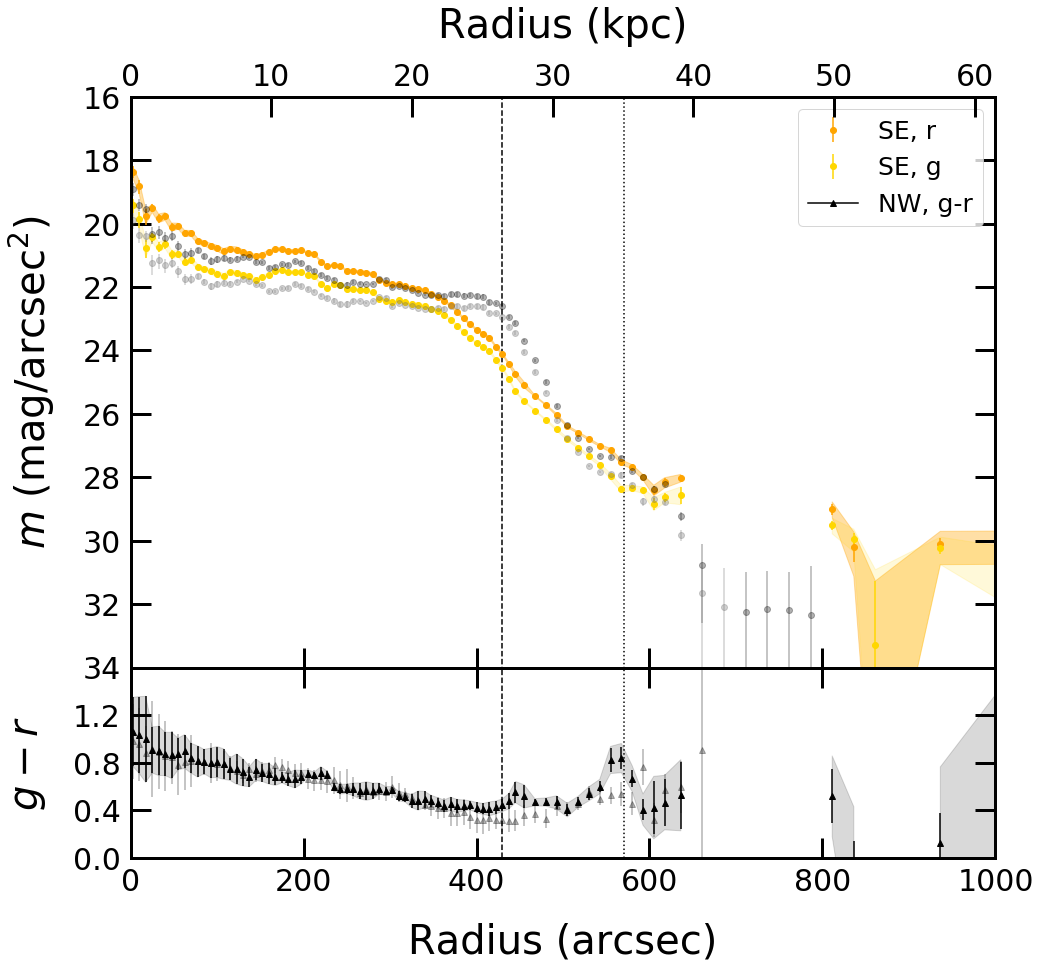

In [6]:
fig, ax0 = plt.subplots(ncols=1, nrows=2)
gs1 = gridspec.GridSpec(2,1,wspace=0,hspace=0, height_ratios = [3,1])

# Upper panel for plotting surface brightness profiles
ax = plt.subplot(gs1[0])

plt.errorbar( np.array(r_r_SE_sub)*pix_size, mag_r_SE_sub, yerr=r_err_SE, label="SE, r", fmt='o', color='orange')
plt.errorbar( np.array(r_g_SE_sub)*pix_size, mag_g_SE_sub, yerr=g_err_SE, label="SE, g", fmt='o', color='gold')

ax.errorbar([0], [0], label="NW, g-r", color='k', marker='^') # Dummy for legend in top panel

# Error envelopes including estimated systematic sky error
plt.fill_between(np.array(r_r_SE_sub)*pix_size,mag_r_ps_SE_sub, mag_r_ms_SE_sub, alpha=0.35, color="orange")
plt.fill_between(np.array(r_g_SE_sub)*pix_size,mag_g_ps_SE_sub, mag_g_ms_SE_sub, alpha=0.15, color="gold")

# Plotting NW profiles in faint grey for reference
plt.errorbar( np.array(r_r_sub)*pix_size, mag_r_sub, yerr=r_err_NW, color='black', fmt='o', alpha=0.3)
plt.errorbar( np.array(r_g_sub)*pix_size, mag_g_sub, yerr=g_err_NW, color='dimgrey', fmt='o', alpha=0.3)

leg = plt.legend(loc=1, prop={'size': 25})

# Setting label info
ax.set_ylabel(r"$m$ (mag/arcsec$^2$)", size=40, labelpad=25)
ax.tick_params(labelsize=30)
ax.set_xticklabels([]) 
ax.invert_yaxis()


# Lower panel for plotting colour profiles
ax2 = plt.subplot(gs1[1])

ax2.errorbar( np.array(r_r_SE_sub)*pix_size, gmr_SE_sub, yerr = gmr_err_SE_sub, label="g-r", color='k', fmt='o', marker='^')
plt.fill_between(np.array(r_r_SE_sub)*pix_size, gmr_m_SE, gmr_p_SE, alpha=0.15, color="k")

# Faint grey NW colour profile for reference
ax2.errorbar( np.array(r_r_sub)*pix_size, gmr_sub, yerr = gmr_err_sub, color='black', fmt='o', marker='^', alpha=0.3)

# Setting label info
ax2.set_ylabel(r"$g-r$", size=40, labelpad=25)
ax2.set_xlabel(r"Radius (arcsec)", size=40, labelpad=25)
ax2.tick_params(labelsize=30)

# Tweaking weight of borders and ticks
ax.spines['bottom'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax2.spines['bottom'].set_linewidth(3)
ax2.spines['top'].set_linewidth(3)
ax2.spines['left'].set_linewidth(3)
ax2.spines['right'].set_linewidth(3)
    
ax.xaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax.yaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax.tick_params(axis='both',which='major',direction='in')
ax2.xaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax2.yaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax2.tick_params(axis='both',which='major',direction='in')


# Marking radii of interest: NW truncation radius and position of excess (fan)
ax.plot([430, 430],[12,35], 'k--')
ax.plot([570, 570],[12,35], 'k:')
ax2.plot([430, 430],[0,2], 'k--')
ax2.plot([570, 570],[0,2], 'k:')

# Secondary x axis for physical length scales
ax3 = ax.twiny()
ax3.set_xlim(0,61.48)  # 1000 arcsec at a distance of 12.7 Mpc
ax3.set_xlabel(r"Radius (kpc)", size=40, labelpad=25)
ax3.tick_params(labelsize=30)
ax3.xaxis.set_tick_params(which='major',size=20,width=3,pad=5,top=True,right=True, direction="in")
    
# Setting axis limits, forcing ticks for colour panel    
ax.set_xlim(0, 1000)
ax.set_ylim(34, 16)
ax2.set_xlim(0, 1000)
ax2.set_ylim(0, 1.6)
ax2.set_yticks([0,0.4, 0.8, 1.2, 1.6])
ax2.set_yticklabels(["0.0","0.4", "0.8", "1.2", ""])

# Saving profiles
#write_profile(r_r_sub, mag_r_sub, filename="/home/cgilhuly/Workspace/Profiles/NGC4565_SE_disc_slice_r_sub.txt")
#write_profile(r_g_sub, mag_g_sub, filename="/home/cgilhuly/Workspace/Profiles/NGC4565_SE_disc_slice_g_sub.txt")

fig.set_size_inches(15.5, 14)
plt.show()

# Figure with SE and NW profiles "back to back"

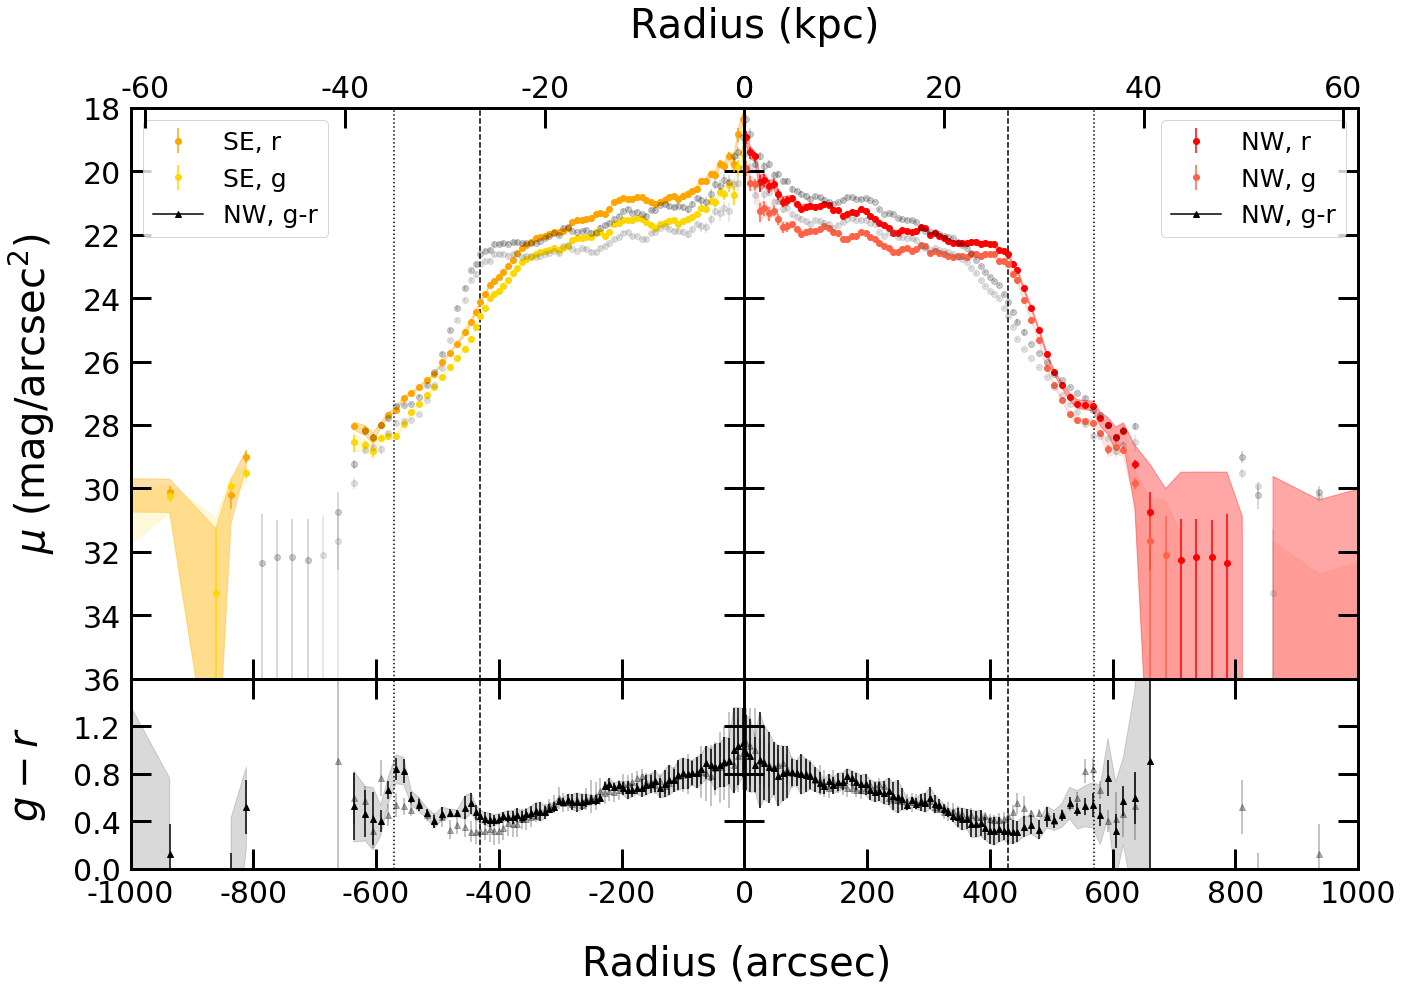

In [7]:
# Making figure with 4 subpanels
fig, ax = plt.subplots(ncols=2, nrows=2)
gs1 = gridspec.GridSpec(2,2,wspace=0,hspace=0, height_ratios = [3,1])

################################################################################
# SE surface brightness profiles (top left panel)
ax0 = plt.subplot(gs1[0])

plt.errorbar( np.array(r_r_SE_sub)*pix_size, mag_r_SE_sub, yerr=r_err_SE, label="SE, r", fmt='o', color='orange')
plt.errorbar( np.array(r_g_SE_sub)*pix_size, mag_g_SE_sub, yerr=g_err_SE, label="SE, g", fmt='o', color='gold')

ax0.errorbar([0], [0], label="NW, g-r", color='k', marker='^') # Dummy for legend

# Eror envelopes including systematic uncertainty in sky
plt.fill_between(np.array(r_r_SE_sub)*pix_size,mag_r_ps_SE_sub, mag_r_ms_SE_sub, alpha=0.35, color="orange")
plt.fill_between(np.array(r_g_SE_sub)*pix_size,mag_g_ps_SE_sub, mag_g_ms_SE_sub, alpha=0.15, color="gold")

# NW profiles in faint grey for reference
plt.errorbar( np.array(r_r_sub)*pix_size, mag_r_sub, yerr=r_err_NW, color='black', fmt='o', alpha=0.2)
plt.errorbar( np.array(r_g_sub)*pix_size, mag_g_sub, yerr=g_err_NW, color='dimgrey', fmt='o', alpha=0.2)

leg = plt.legend(loc=2, prop={'size': 25})  

ax0.set_xticklabels([])
ax0.set_ylabel(r"$\mu$ (mag/arcsec$^2$)", size=40, labelpad=25)
ax0.invert_yaxis()


################################################################################
# SE g-r profile (lower left panel)
ax2 = plt.subplot(gs1[2])

ax2.errorbar( np.array(r_r_SE_sub)*pix_size, gmr_SE_sub, yerr = gmr_err_SE_sub, label="g-r", color='k', fmt='o', marker='^')
plt.fill_between(np.array(r_r_SE_sub)*pix_size, gmr_m_SE, gmr_p_SE, alpha=0.15, color="k")

# NW profile in faint grey for reference
ax2.errorbar( np.array(r_r_sub)*pix_size, gmr_sub, yerr = gmr_err_sub, color='black', fmt='o', marker='^', alpha=0.3)

ax2.set_ylabel(r"$g-r$", size=40, labelpad=25)


################################################################################
# NW surface brightness profiles (top right panel)
ax1 = plt.subplot(gs1[1])

plt.errorbar( np.array(r_r_sub)*pix_size, mag_r_sub, yerr=r_err_NW, label="NW, r", fmt='o', color='red')
plt.errorbar( np.array(r_g_sub)*pix_size, mag_g_sub, yerr=g_err_NW, label="NW, g", fmt='o', color='tomato')

ax1.errorbar([0], [0], label="NW, g-r", color='k', marker='^') # Dummy for legend

# Error envelopes including systematic uncertainty in sky
plt.fill_between(np.array(r_r_sub)*pix_size,mag_r_ps_sub, mag_r_ms_sub, alpha=0.35, color="red")
plt.fill_between(np.array(r_g_sub)*pix_size,mag_g_ps_sub, mag_g_ms_sub, alpha=0.15, color="tomato")

# SE profiles in faint grey for reference
plt.errorbar( np.array(r_r_SE_sub)*pix_size, mag_r_SE_sub, yerr=r_err_SE, color='black', fmt='o', alpha=0.2)
plt.errorbar( np.array(r_g_SE_sub)*pix_size, mag_g_SE_sub, yerr=g_err_SE, color='dimgrey', fmt='o', alpha=0.2)

leg = plt.legend(loc=1, prop={'size': 25})
    
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.invert_yaxis()


################################################################################
# NW g-r profiles (bottom right panel)
ax3 = plt.subplot(gs1[3])

ax3.errorbar( np.array(r_r_sub)*pix_size, gmr_sub, yerr = gmr_err_sub, label="g-r", color='k', fmt='o', marker='^')
plt.fill_between(np.array(r_r_sub)*pix_size, gmr_m_NW, gmr_p_NW, alpha=0.15, color="k")

# SE profile in faint grey for reference
ax3.errorbar( np.array(r_r_SE_sub)*pix_size, gmr_SE_sub, yerr = gmr_err_SE_sub, color='black', fmt='o', marker='^', alpha=0.3)

ax3.set_yticklabels([])


################################################################################
# Common formatting for all subplots
for axis in [ax0, ax1, ax2, ax3]: 
    
    # Tick parameters
    axis.tick_params(axis='both',which='major',direction='in')
    axis.tick_params(labelsize=30)
    axis.yaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
    axis.xaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
     
    # Tweaking line weights
    axis.spines['bottom'].set_linewidth(3)
    axis.spines['top'].set_linewidth(3)
    axis.spines['left'].set_linewidth(3)
    axis.spines['right'].set_linewidth(3)
    
    # Adding lines for NW truncation radius and fan radius
    axis.plot([430, 430],[0,36], 'k--')
    axis.plot([570, 570],[0,36], 'k:')
    
# Secondary x axis for physical length scales (SE side)
ax02 = ax0.twiny()
ax02.set_xlim(61.48,0)  # 1000 arcsec at a distance of 12.7 Mpc
ax02.tick_params(labelsize=30)
ax02.xaxis.set_tick_params(which='major',size=20,width=3,pad=5,top=True,right=True, direction="in")

# Secondary x axis (NW side)
ax12 = ax1.twiny()
ax12.set_xlim(0,61.48)  # 1000 arcsec at a distance of 12.7 Mpc
ax12.tick_params(labelsize=30)
ax12.xaxis.set_tick_params(which='major',size=20,width=3,pad=5,top=True,right=True, direction="in")

# Fixing plot limits
ax1.set_xlim(0, 1000)
ax1.set_ylim(36, 18)
ax3.set_xlim(0, 1000)
ax3.set_ylim(0, 1.6)
ax3.set_yticks([0,0.4, 0.8, 1.2, 1.6])

ax0.set_xlim(1000,0)
ax0.set_ylim(36, 18)
ax2.set_xlim(1000, 0)
ax2.set_ylim(0, 1.6)
ax2.set_yticks([0,0.4, 0.8, 1.2, 1.6])
ax2.set_yticklabels(["0.0","0.4", "0.8", "1.2", ""])

# Using negative radius labels for reversed SE side of figure
ax2.set_xticklabels(["", "-200", "-400", "-600", "-800", "-1000"])
ax02.set_xticklabels(["0", "-20", "-40", "-60"])

# Shared axis labels
fig.text(0.41, 0.02, "Radius (arcsec)", size=40)
fig.text(0.44, 0.95, "Radius (kpc)", size=40)

fig.set_size_inches(22, 14)
plt.show()

### Comparison with Wu et al. (2002) 660 nm profiles (~i band)

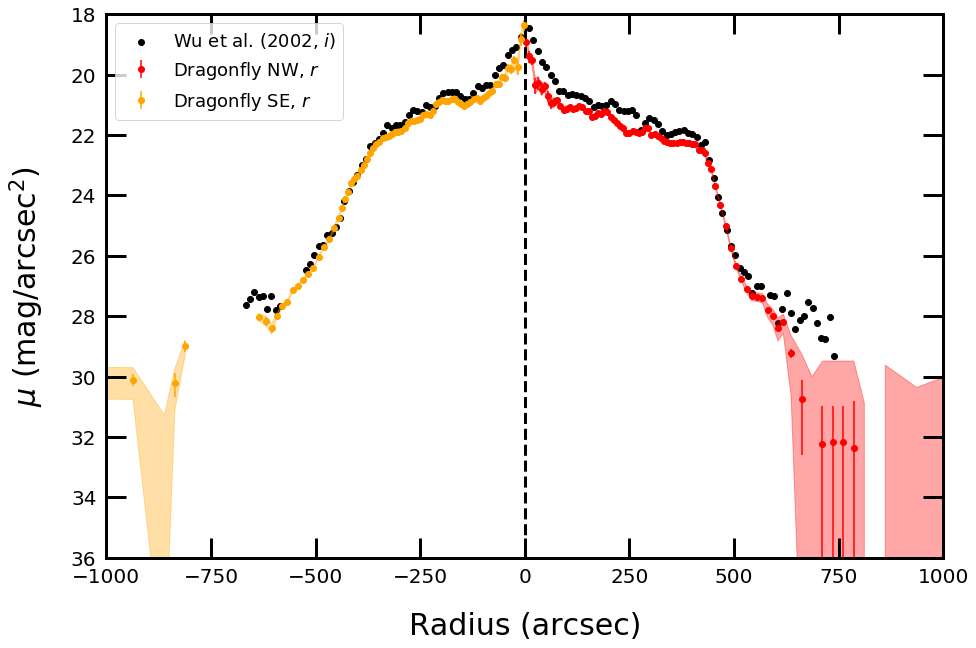

In [10]:
# Profile in NGC4565_wu02_i.prof in ~/Workspace/Profiles
# Relevant columns: 1 (radius in arcsec), 3 (SB in mag/arcsec^2)

wu_data = open("/home/cgilhuly/Workspace/Profiles/NGC4565_wu02_i.prof", "r")
SB_wu = []
rad_wu = []

for line in wu_data:
    
    if line.startswith( "#" ):
        continue
        
    SB_wu.append( float( line.split()[3] ) )
    rad_wu.append( float( line.split()[1] ) )
    
wu_data.close()

fig, ax = plt.subplots()

plt.scatter( rad_wu, SB_wu, c='k', label="Wu et al. (2002, $i$)" )
plt.errorbar( np.array(r_r_sub)*pix_size, mag_r_sub, yerr=r_err_NW, label="Dragonfly NW, $r$", fmt='o', color='red')
plt.errorbar( np.array(r_r_SE_sub)*pix_size*-1., mag_r_SE_sub, yerr=r_err_SE, label="Dragonfly SE, $r$", fmt='o', color='orange')

plt.fill_between(np.array(r_r_sub)*pix_size,mag_r_ps_sub, mag_r_ms_sub, alpha=0.35, color="red")
plt.fill_between(np.array(r_r_SE_sub)*pix_size*-1.,mag_r_ps_SE_sub, mag_r_ms_SE_sub, alpha=0.35, color="orange")

ax.set_ylabel(r"$\mu$ (mag/arcsec$^2$)", size=30, labelpad=25)
ax.set_xlabel(r"Radius (arcsec)", size=30, labelpad=25)

leg = plt.legend(loc=2, prop={'size': 18})

# Tweaking appearance of plot
ax.spines['bottom'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)

ax.tick_params(labelsize=20)
ax.xaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax.yaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax.tick_params(axis='both',which='major',direction='in')

ax.set_xlim(-1000,1000)
ax.set_ylim(36, 18)

# Plotting vertical line at galaxy centre (r = 0)
ax.plot([0, 0],[0,36], 'k--', lw=3)

fig.set_size_inches(15, 10)

plt.show()